# SNLP Assignment 5

Name 1: Parnian Jahangirirad  
Student id 1: 7062810  
Email 1: paja00003@stud.uni-saarland.de  
 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Notes!!

* Unless specified specifically, you only need to lowercase the text (training and test). You don't need to apply further preprocessing such as removing the punctuations.
* For theoretical answer, you always need to add some explanations. Generally, 1-3 sentences are enough.
* If you get math error or divide by zero error, try substituting 0 with an extremely small value like $1e-6$.
* For Q3, you can use the pre-trained BPE tokenizer from Q1 (i.e. `ex1.tokenize_bpe()`)
* In case you face some weird issue even if your implementation seems correct, try restarting the kernel and rerunning your code.
* If you face any problems with libraries (like Huggingface Transformers), try running the notebook on [Google Colab](https://colab.research.google.com/).
* **Make sure that you include the python scripts (exercise_1.py and exercise_2_and_3.py without \_pycache\_) along with your solution notebook in the submission zip file.**

## Exercise 1 - Tokenization (3 points)

In the lecture, we learnt about Byte-Pair Encodings (BPE) and Morfessor tokenizer. In this exercise, we'll use these tokenizers and see how they work. You are given a text file `moby_dick.txt` which you'll use to train the tokenizer, and then you'll tokenize the text in `burgess.txt` and compute the entropy of the tokenized text distribution.

---

### Solution 1

In [8]:
# For BPE use Huggingface Tokenizer library
# and for Morfesor use Morfessor library
# tqdm is for progress bar
#pip install tokenizers morfessor tqdm

SyntaxError: invalid syntax (<ipython-input-8-bc5341c3d0c2>, line 4)

In [2]:
pip install morfessor tokenizers tqdm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tokenizers in c:\users\pjrad\appdata\local\programs\python\python39\lib\site-packages (0.19.1)




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [136]:
# Use this to train the tokenizer as well as the Language models
training_file = "data/moby_dick.txt"

# Tokenize the test text and compute the entropy
# and later perplexity using Language models
test_file = "data/burgess.txt"

In [137]:
# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_1.py` file
# You might have to rerun this cell if you make changes to the `exercise_1.py` file
import  exercise_1
from importlib import reload

reload(exercise_1)

ex1 = exercise_1.TokenizerEntropy()

#### BPE tokenizer (1.5 point)

Let's start with BPE tokenizer. Byte Pair Encoding (BPE) is a subword tokenization method that iteratively merges the most frequent pair of bytes or characters in a text corpus to form new, longer subword units. This process continues until a specified vocabulary size is reached, balancing the trade-off between token granularity and vocabulary size. 

a. Train the BPE tokenizer on the `moby_dick.txt` file (in the cell below). You can use the built-in trainer from Huggingface tokenizers library (see: [docs](https://huggingface.co/docs/tokenizers/pipeline) and the imports below) (0.25 point)  
b. Complete the `tokenize_bpe()` function in `exercise_1.py`. (0.25 point)  
c. Complete the `get_probs()` function in `exercise_1.py`. (0.25 point)  
d. Complete the `compute_entropy` function in `exercise_1.py`. Then, compute the entropy of the tokenized distribution of `burgess.txt`. (0.25 point)  
e. Plot the zipf's plot for the tokenized text (rank vs probability/frequency). (0.25 point)  
f. What does the entropy of the tokenized text distribution mean? Explain in 2-3 sentences. (0.25 point)  

Note: Using the defaults for the parameters of BPE (like vocabulary size) is okay.

In [138]:
# For BPE
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.normalizers import Lowercase
from itertools import islice

# Train BPE model
# Using the default parameters is fine
# ====================================
# Your code here

# Reading file in chunks in order to reduce the runtime
def read_in_chunks(file_object, chunk_size=1024):
    while True:
        data = file_object.read(chunk_size)
        if not data:
            break
        yield data

with open(training_file, 'r', encoding='utf-8') as file:
    text = list(read_in_chunks(file))

BPE_tokenizer = Tokenizer(BPE())
trainer = BpeTrainer(special_tokens=["<s>", "<pad>", "</s>", "<unk>"])
BPE_tokenizer.train_from_iterator([text], trainer=trainer)

# ====================================

# Compute the entropy of the test text
test_text = open(test_file).read().strip().lower()
bpe_entropy = ex1.compute_entropy(test_text, tokenizer=BPE_tokenizer)

print(f"BPE entropy: {bpe_entropy:.2f}")

sorted_token_probs:  {'. ': 0.022155867423111375, 'er ': 0.018990743505524037, 'bust': 0.012899372947148402, 'he ': 0.010749477455957002, 'little ': 0.010331442221558674, 'and ': 0.008241266049567035, 'i ': 0.008062108091967751, '.': 0.0074649148999701405, ' . ': 0.007106598984771574, 'jo': 0.006867721707972529, 'bear ': 0.006569125111973723, "' s ": 0.006509405792773962, 'farm': 0.005971931919976112, 'brown ': 0.005971931919976112, 'e ': 0.005673335323977307, 'green ': 0.005195580770379218, 'it ': 0.00477754553598089, 'boy ': 0.004419229620782323, 'p': 0.0041803523439832785, 'for': 0.0040011943863839956, 'my ': 0.003941475067184234, 'had ': 0.003941475067184234, 'was ': 0.003881755747984473, 'i': 0.0037623171095849508, 'of ': 0.003463720513586145, 'he was ': 0.003404001194386384, 'he had ': 0.003404001194386384, '. " ': 0.003344281875186623, 'out ': 0.0032845625559868616, 'black': 0.0032248432367871006, 'b': 0.003105404598387578, 'but ': 0.003105404598387578, '_': 0.003105404598387578

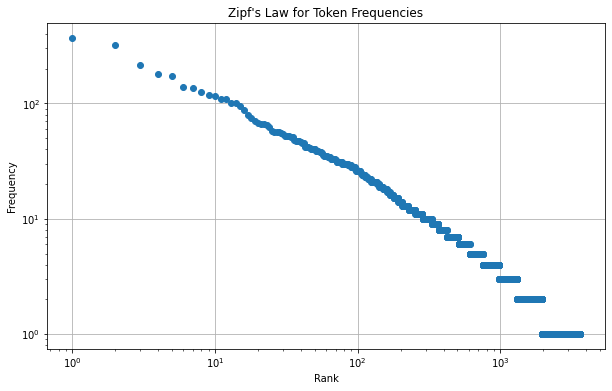

In [30]:
# Plot the zipf's line
import matplotlib.pyplot as plt
from collections import Counter
# ====================================
# Your code here
tokens = tokenizer.encode(test_text).tokens
tokens_count = Counter(tokens)
sorted_tokens_count = sorted(tokens_count.items(), key=lambda item: item[1], reverse=True)
ranks = range(1, len(sorted_tokens_count) + 1)
frequencies = [count for token, count in sorted_tokens_count]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='o', linestyle='none')
plt.title("Zipf's Law for Token Frequencies")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# ====================================

#### Morfessor tokenizer (1.5 point)

Now, we'll repeat the same for the Morfessor tokenizer. Morfessor is used for morphological segmentation or tokenization. You can read about Morfessor from this [report](https://aaltodoc.aalto.fi/items/8c912f1c-2b56-4c12-a60d-1c340aa24b01) and the [library documentation](https://morfessor.readthedocs.io/en/latest/general.html).

a. Train the Morfessor tokenizer on the `moby_dick.txt` file (in the cell below). (0.25 point)

   - The Morfessor tokenizer expects the training data to be a text file containing a list of words and it's frequency in the corpus (see below). Take the `moby_dick.txt` file, convert it into a list of words (you can simply split by spaces) and write it into `morfessor_training.txt` file.

     ```
        22 the
        1 hello
        4 is
        1 test-based
        ...
   - Run the cell below to train the morfessor model on this training data.
   
b. Complete the `tokenize_morfessor()` function in `exercise_1.py`. (0.5 point)  
c. Plot the zipf's plot for the tokenized text (rank vs probability/frequency). (0.25 point)  
d. Compute the entropy for the test set using Morfessor tokenizer. How does the entropy compare to BPE? (0.25)  
e. Based solely on the entropy, which tokenizer would you prefer? Explain in 2-3 sentences. (0.25)  

In [5]:
# For Morfessor
import morfessor

In [31]:
# Read the training file
# Convert it into a list of words (separate by whitespace)
# And, save it to a file called `morfessor_training.txt`


# ====================================
# Your code here
# Function to read file in chunks
def read_in_chunks(file_object, chunk_size=1024):
    while True:
        text = file_object.read(chunk_size)
        if not text:
            break
        yield text

# Read the file and count words
words_count = Counter()
with open(training_file, 'r', encoding='utf-8') as file:
    for chunk in read_in_chunks(file):
        words_count.update(chunk.split())

# Prepare data as a list of tuples (count, word)
text = [(count, word) for word, count in words_count.items()]
mor_train_file = 'morfessor_training.txt'
# Save the formatted data to a file (optional)

with open(mor_train_file, 'w', encoding='utf-8') as file:
    for count, word in text:
        file.write(f"{count} {word}\n")
# ====================================

In [32]:
# Train Morfessor model using the morfessor_traininig.txt file
# and save the trained model as morfessor_model.bin
# We're using the morfessor-train command in the CLI with default arguments
# due to it's ease of use, you can also use the Morfessor API if you prefer

#!morfessor-train morfessor_training.txt -s morfessor_model.bin
#'morfessor-train' is not recognized as an internal or external command,
#operable program or batch file.

morfessor_model_file = 'morfessor_model.bin'

# Check that the data file is correctly formatted
with open(mor_train_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()


# Making sure there are no empty lines or incorrect formats, causing problems
data = []
with open(mor_train_file, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                count = int(parts[0])
                word = parts[1]
                data.append((count, word))
            except ValueError:
                print(f"Skipping line due to value error: {line.strip()}")
        else:
            print(f"Skipping incorrectly formatted line: {line.strip()}")


model = morfessor.BaselineModel()

# Train the model with the training data
try:
    model.load_data(data)
    model.train_batch()
except ValueError as e:
    print(f"ValueError: {e}")
    print("Problematic line(s):")
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 2:
            print(f"Incorrectly formatted line: {line.strip()}")
        else:
            try:
                count = int(parts[0])
                word = parts[1]
            except ValueError:
                print(f"Value error in line: {line.strip()}")

# Save the trained model using morfessor.io
io = morfessor.io.MorfessorIO()
io.write_binary_model_file(morfessor_model_file, model)

...........................................................
...........................................................
...........................................................


In [33]:
# Load the trained model
morfessor_model = io.read_binary_model_file('morfessor_model.bin')

# Compute the entropy of the test text
test_text = open(test_file).read().strip().lower()
morfessor_entropy = ex1.compute_entropy(test_text, tokenizer=morfessor_model)

print(f"Morfessor entropy: {morfessor_entropy:.2f}")

Morfessor entropy: 10.82


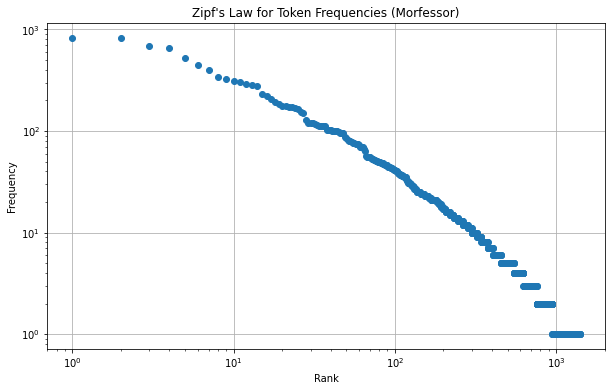

In [34]:
# Plot the zipf's line
import matplotlib.pyplot as plt

# ====================================
# Your code here
# Tokenizing
tokens = []
for word in test_text.split():
    segments = morfessor_model.viterbi_segment(word)[0]
    tokens.extend(segments)

# Counting Frequency
token_counts = Counter(tokens)

# Sorting tokens
sorted_token_counts = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)
ranks = range(1, len(sorted_token_counts) + 1)
frequencies = [count for token, count in sorted_token_counts]

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='o', linestyle='none')
plt.title("Zipf's Law for Token Frequencies (Morfessor)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# ====================================

## Exercise 2 - Maximum Likelihood Estimate (3 points)

### Estimating the Maximum likelihood from a given text

a. Consider the formula on Page 31 in Chapter 2. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (0.5 point)

b. Check the following small corpus of text. (0.25 point)

> &lt;s> I am learning the SNLP course. &lt;/s>  
&lt;s> The SNLP course is fun. &lt;/s>  
&lt;s> I am studying a lot of stuff. &lt;/s>  
&lt;s> I'm enjoying the fun topics. &lt;/s>

Now, using MLE, compute the probabilities for the following (assume we lowercase the corpus):  
i. `P(snlp|the)`  
ii. `P(learning|i am)`

### Does the choice of tokenizer have any effect on the Language model?
c. You are going to implement a general n-gram Language model in `exercise_2_and_3.py`. This takes `n_gram` as a parameter where `n_gram=2` would result in a bigram model.

   - Implement the `get_counts()` function in `exercise_2_and_3.py`. This function takes a list of tokens and `n` and calculates the frequency of each n-gram occurrence in the training set. (0.5 points)
   - Implement the `train()` function in `exercise_2_and_3.py`. This function takes a list of tokens, gets the counts of n-grams using the `get_counts()` function and saves the respective counts to `n_gram_counts`, `n_minus_1_gram_counts` and `unigram_counts` attribute of `LanguageModel`. Then, it computes the MLE estimates for each n-gram and saves it in the `prob` attribute of `LanguageModel` class. (0.5 points)
   - Implement the `perplexity()` function in `exercise_2_and_3.py`. This function takes a list of tokens (from the test set) and computes the perplexity on that text corpus. (0.5 points)
   - Train the model on `moby_dick.txt` using the BPE tokenizer (You can use the pre-trained BPE and the `ex1.tokenize_bpe()` function from Q1). Then, compute the perplexity on the `burgess.txt` file. (0.25 points)
   - Repeat above step but using Morfessor tokenizer. You can use the pre-trained Morfessor model and `ex1.tokenize_morfessor()` function form Q1. (0.25 points)

   NOTE: We cannot directly compare the perplexity of a language model that use different tokenizers since they can generate different number of tokens ([Read this](https://sjmielke.com/comparing-perplexities.htm)). A possible fix for this is normalizing the sum of log-probabilities with the number of words (in the text corpus you are evaluating) similar to computing the perplexity at the word level:
   $$PP = exp(-\frac{1}{num\_words} \sum_{i}^{n\_ngrams} log(p(w_i|h_i)))$$

d. How is the perplexity affected by the choice of tokenizer? What does it mean for each tokenizer? (0.25 points)

---

### Solution 2

##### Solution 2.a  
![](exe2a.jpg)

##### Solution 2.b  
![](exe2b.jpg)

In [57]:
# Solution 2.c
# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_2_and_3.py` file
# You might have to rerun this cell if you make changes to the `exercise_2_and_3.py` file

import exercise_2_and_3
from importlib import reload

reload(exercise_2_and_3)

<module 'exercise_2_and_3' from 'c:\\Users\\pjrad\\OneDrive\\Desktop\\Msc-se1\\NLP\\Assignments\\Assignment_5\\exercise_2_and_3.py'>

#### Using BPE

In [46]:
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
# Remember you can use the pre-trained BPE tokenizer from Q1

# ====================================
# Your code here
tokenizer = BPE_tokenizer
tokens = ex1.tokenize_bpe(tokenizer,training_file)
lm.train(tokens)
# ====================================

In [47]:
# Computing Perplexity on test set

# ====================================
# Your code here
test_text = open(test_file).read().strip().lower()
#print(test_text)
test_tokens = ex1.tokenize_bpe(tokenizer,test_text)
#print(test_tokens)
n_words = len(set(test_tokens))  # Number of unique words in the test set
bpm_test_perplexity = lm.perplexity(test_tokens, n_words)
print('BPM test perplexity: ',bpm_test_perplexity)
# ====================================

BPM test perplexity:  1.0064273147222518


#### Using Morfessor

In [48]:
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
# Remember you can use the pre-trained Morfessor tokenizer from Q1
# ====================================
# Your code here
tokens = ex1.tokenize_morfessor(morfessor_model, training_file)
lm.train(tokens)
# ====================================

In [50]:
# Computing Perplexity on test set

# ====================================
# Your code here
test_tokens = tokenizer_entropy.tokenize_morfessor(morfessor_model,test_text)
n_words = len(set(test_tokens))  # Number of unique words in the test set
mor_test_perplexity = lm.perplexity(test_tokens, n_words)
print('Morfessor test perplexity: ',mor_test_perplexity)
# ====================================

Morfessor test perplexity:  1.0066309150604607


##### Solution 2.d  
Using BPM tokenizer, we would have a slightly lower perplexity compared to Morfessor tokenizer. BPE is good at capturing frequent subword pattern, while morfessor is good at identifying meaningful morphems. According to results, bpm tokenizer alligns (slightly) better with our dataset.

## Exercise 3 - Backing off Language Models (4 points)

a. Complete the `generate()` function in `exercise_2_and_3.py` that takes a history (tokenized list) and then predicts the most likely next token based on the calculated probability distribution. (0.5 point)  
b. Complete the `get_smoothed_probs()` function using the following formulas in `exercise_2_and_3.py`. (1 point) 
    $$P_{abs}(w_i|w_{i-1}) = \frac{max\{N(w_{i-1}, w_i) - d, 0\}}{\sum_{w^{'}} N(w_{i-1}, w^{'})} + \lambda(w_{i-1}) P_{abs}(w_i)$$
    $$P_{abs}(w_i) = \frac{max\{N(w_i)-d, 0\}}{\sum_{w^{'}} N(w^{'})} + \lambda(.) P_{unif}(w_i)$$
    $$\lambda(w_{i-1}) = \frac{d}{\sum_{w^{'}} N(w_{i-1}, w^{'})} N_{1+}(w_{i-1}, \cdot)$$
    $$\lambda(.) = \frac{d}{\sum_{w^{'}} N(w^{'})}N_{1+}$$   

Where,  
    $P_{unif}(w_i)$ is the uniform distribution over the number of unigrams.  
    $N_{1+}(w_{i-1}, \cdot)$ is the number of n-grams where $w_{i-1}$ occurs as history at least once.  
    $N_{1+}$ is the number of unigrams that occur at least once i.e. simply the number of unigrams in the `unigram_counts`.  
    
c. Complete the `generate_absolute_smoothing()` function in `exercise_2_and_3.py`. (0.5 point)  

d. Initialize a bigram language model (`n_gram=2`). Train it on `moby_dick.txt` (use BPE Tokenizer). Generate a continuation for "_The computer_" (i.e. $w_{i-1}=$ _The computer_) for 5 tokens using the `generate()` function. What did you get? Now, generate continuation for it using the `generate_absolute_smoothing()` function. What did you get now? (0.5 points)  


---

### Solution 3

In [1]:
# Solution Q3

# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_2_and_3.py` file
# You might have to rerun this cell if you make changes to the `exercise_2_and_3.py` file

import exercise_2_and_3
from importlib import reload

reload(exercise_2_and_3)

<module 'exercise_2_and_3' from 'c:\\Users\\pjrad\\OneDrive\\Desktop\\Msc-se1\\NLP\\Assignments\\Assignment_5_1\\exercise_2_and_3.py'>

In [110]:
# Solution 3.d
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
with open(training_file, 'r', encoding='utf-8') as file:
    training_text = list(read_in_chunks(file))

training_text = ' '.join(training_text)
tokenizer = BPE_tokenizer
tokens = ex1.tokenize_bpe(tokenizer,training_text)

print("No. of tokens: ", len(tokens))

lm.train(tokens)

No. of tokens:  206948


In [111]:
# Solution 3.d
# Generating text using ngram probabilities
# with seen n-grams
history = "Captain Ahab went"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['captain ', 'a', 'ha', 'b ', 'went']
['captain ', 'a', 'ha', 'b ', 'went', ' the ', 'p', 'equ', 'od ', "' s "]


In [112]:
# Solution 3.d
# Generating text using ngram probabilities
# with unseen n-grams
history = "The computer"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['the ', 'comp', 'u', 'ter']
['the ', 'comp', 'u', 'ter', 'tiary ', 'system ', 'does not ', 'seem to be ', 'several ']


In [113]:
# Solution 3.d
# Generating text using smoothed probabilities
# Note: This might take a few minutes
history = "The computer"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate_absolute_smoothing(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['the ', 'comp', 'u', 'ter']
['the ', 'comp', 'u', 'ter', 'lude ', 'and sol', 'and', ' to teach', ' them ']


## Bonus

## Bonus 1 - More Tokenizers (2 points)

Repeat Exercise 1, but with the following:

* Whitespace tokenizer (0.5 point)
* Another tokenizer of your choice (e.g. Wordpiece) (0.5 point)

a. How do they compare to BPE and Morfessor in terms of the tokenized output? (0.5 point)   
b. How do they compare to BPE and Morfessor in terms of the entropy of the tokenized text? Which one seems better now? (0.5 point)  


----

In [123]:
import math
from collections import Counter

# Function to tokenize text using whitespace
def whitespace_tokenizer(text):
    return text.lower().strip().split()

# Function to compute entropy
def compute_entropy(text, tokenizer):
    tokenized_text = tokenizer(text)
    word_counts = Counter(tokenized_text)
    total_words = len(tokenized_text)
    entropy = 0.0
    for count in word_counts.values():
        probability = count / total_words
        entropy -= probability * math.log2(probability)
    return entropy

# Reading file in chunks in order to reduce the runtime
def read_in_chunks(file_object, chunk_size=1024):
    while True:
        data = file_object.read(chunk_size)
        if not data:
            break
        yield data


# Tokenize the training text
training_tokens = whitespace_tokenizer(training_text)

# Compute entropy using the whitespace tokenizer
whitespace_entropy = compute_entropy(test_text, whitespace_tokenizer)

print(f"Whitespace tokenizer entropy: {whitespace_entropy:.2f}")

Whitespace tokenizer entropy: 8.11


In [139]:
import math
from collections import Counter
from transformers import BertTokenizerFast

# Initialize the WordPiece tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Function to tokenize text using WordPiece
def wordpiece_tokenizer(text):
    tokens = tokenizer.tokenize(text)
    return tokens

# Function to compute entropy
def compute_entropy(text, tokenizer_function):
    tokenized_text = tokenizer_function(text)
    word_counts = Counter(tokenized_text)
    total_words = len(tokenized_text)
    entropy = 0.0
    for count in word_counts.values():
        probability = count / total_words
        entropy -= probability * math.log2(probability)
    return entropy

# Reading file in chunks in order to reduce the runtime
def read_in_chunks(file_object, chunk_size=1024):
    while True:
        data = file_object.read(chunk_size)
        if not data:
            break
        yield data

# Example training text and test text
training_text = "Your training text here"
test_text = "Your test text here"

# Tokenize the training text
training_tokens = wordpiece_tokenizer(training_text)

# Compute entropy using the WordPiece tokenizer
wordpiece_entropy = compute_entropy(test_text, wordpiece_tokenizer)

print(f"WordPiece tokenizer entropy: {wordpiece_entropy:.2f}")

c:\Users\pjrad\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\pjrad\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pjrad\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

WordPiece tokenizer entropy: 2.00


#### a:  
wordpiece tokenizer generates the most consistent and predictable tokens among the four tokenizers.  
#### b:  
They both had lower entropies compared to bpe and morfessor tokenizers. Considering entropies, Wordpiece tokenizer seems to be the best option for the tokenizer(lowest entropy among all tested tokenizers).  

## Bonus 2 - Back off! (1 points)

a. What is an problem with absolute discounting? (0.5 point)  
b. How can you fix it? Is there another back-off appraoch we can use? (0.5 point)

----

a:  
Absolute discounting is a technique which is used in language models to handle unseen n-grams, works by subtracting a fixed constant from the maximum likelihood estimate of the n-gram probabilities to handle unseen n-grams.

The problem with absolute discounting is it can lead to underestimating the probabilities of lower order n-grams, for example: unigrams or bigrams, when the higher-order n-grams like trigrams or 4-grams are not represented well in the training data. This will cause serious problems as the language model may not be able to accurate in capturing the true distribution of the language.  
b:  
To handle such problems in language models, we can use another back-off approach which is called "Witten-Bell Smoothing". This approach uses the number of unique n-grams that follow a particular (n-1)-gram to estimate the probability mass for unseen n-grams.  